# Enjoy  BabyEnv

See observation data, action space and all stuff contained in BabyEnv

In [1]:
import gym
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import baby.envs
from baby.envs.baby_env import default_conf

In [2]:
default_conf

{'seed': 0,
 'n_frame': 20,
 'n-xaxis': 21,
 'n-yaxis': 9,
 'max_episode_iteration': 1000,
 'alpha_ground_truth': 0.8,
 'alpha_slow_ground_truth': 0.1,
 'alpha_slow_freq': 2,
 'validation_threshold': 0.8,
 'sigma_prediction': 1.0,
 'gamma_gaussian_value': 1.5,
 'sigma_gaussian_value': 2.0,
 'reward': {'timestep': 0, 'validation': 1, 'done': 0}}

In [3]:
# Create env
env = gym.make('baby-v0')

In [4]:
# Check observation space
env.observation_space

Box(9, 21, 21)

In [5]:
# Check action space
env.action_space

Discrete(189)

In [6]:
# See full configuration
print(json.dumps(env.conf, indent=4))

{
    "seed": 0,
    "n_frame": 20,
    "n-xaxis": 21,
    "n-yaxis": 9,
    "max_episode_iteration": 1000,
    "alpha_ground_truth": 0.8,
    "alpha_slow_ground_truth": 0.1,
    "alpha_slow_freq": 2,
    "validation_threshold": 0.8,
    "sigma_prediction": 1.0,
    "gamma_gaussian_value": 1.5,
    "sigma_gaussian_value": 2.0,
    "reward": {
        "timestep": 0,
        "validation": 1,
        "done": 0
    }
}


In [7]:
env.conf['sigma_prediction'] = 0.3
env.conf['gamma_gaussian_value'] = 0.05
env.conf['sigma_gaussian_value'] = 0.1

### Ground-truth
Ground truth are matrix generated with numpy random and filter gaussian 
in oder to have geographical consistency between frames

In [8]:
# Take first n frames
n=10

env.reset()
first_frame_truth = env.ground_truth[:, :, :n]
first_frame_truth = np.swapaxes(first_frame_truth, axis1=-1, axis2=0)

Frame #0 | shape=(21, 9)


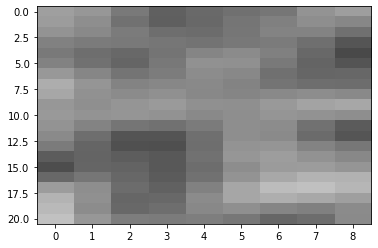

Frame #1 | shape=(21, 9)


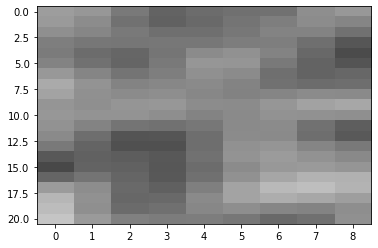

Frame #2 | shape=(21, 9)


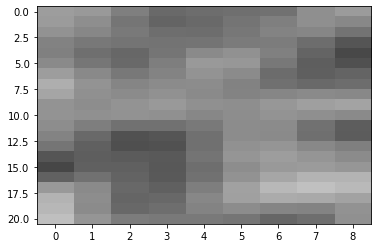

Frame #3 | shape=(21, 9)


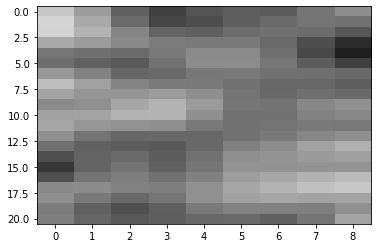

Frame #4 | shape=(21, 9)


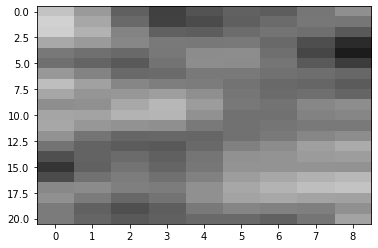

Frame #5 | shape=(21, 9)


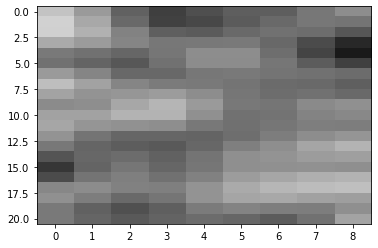

Frame #6 | shape=(21, 9)


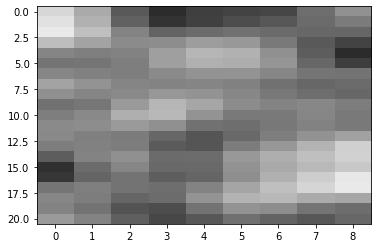

Frame #7 | shape=(21, 9)


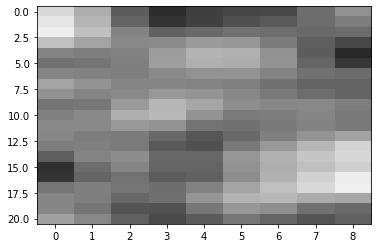

Frame #8 | shape=(21, 9)


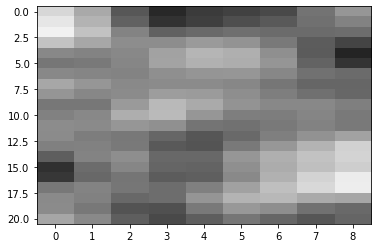

Frame #9 | shape=(21, 9)


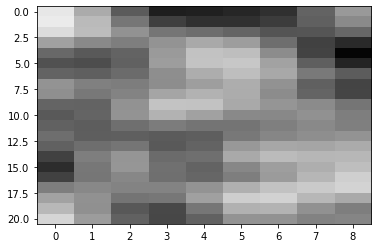

In [9]:
for num, frame in enumerate(first_frame_truth):
    print(f"Frame #{num} | shape={frame.shape}")
    
    # For visual representation flip vertical axis
    frame_repr = np.flip(frame, axis=0)
    
    # Show into notebook in grayscale
    plt.imshow(frame, cmap='gray', vmin=0.0, vmax=1.0, interpolation='nearest', aspect='auto')
    plt.show()

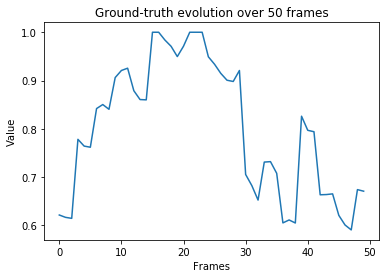

In [10]:
# Visual evolution of a single point (0, 0) over n frames
n=50
truth_evo = env.ground_truth[0, 0, :n]
plt.plot(truth_evo)
plt.title(f'Ground-truth evolution over {n} frames')
plt.xlabel('Frames')
plt.ylabel('Value')
plt.show()

In [11]:
# Overall statistics over frames
print(f"Mean ground truth: {np.mean(env.ground_truth)}")
print(f"Std deviation ground truth: {np.std(env.ground_truth)}")

Mean ground truth: 0.5429393203414927
Std deviation ground truth: 0.29667459198928897


## Impact of alpha_ground_truth on ground truth evolution
Modifying conf to see different options

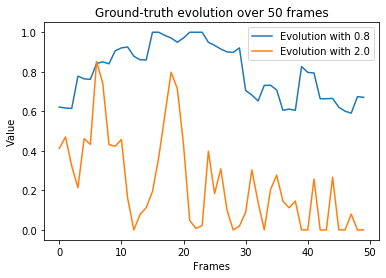

In [12]:
stored_ground_truth_prev_value = np.copy(env.ground_truth[0, 0, :n])
origin_alpha = env.conf['alpha_ground_truth']
env.conf['alpha_ground_truth'] = 2.0
env.conf['alpha_slow_ground_truth'] = 1.0

# Reset ground truth
env.reset()

plt.plot(stored_ground_truth_prev_value, label=f"Evolution with {origin_alpha}")
plt.plot(env.ground_truth[0, 0, :n], label=f"Evolution with {env.conf['alpha_ground_truth']}")
plt.title(f'Ground-truth evolution over {n} frames')
plt.xlabel('Frames')
plt.ylabel('Value')
plt.legend()
plt.show()

In [13]:
# Restore old value
env.conf['alpha_ground_truth'] = origin_alpha

## Forecast compared to ground-truth

In [17]:
env.conf['sigma_prediction'] = 0.2
env.conf['gamma_gaussian_value'] = 0.05
env.conf['sigma_gaussian_value'] = 0.1


def show_prediction_ground_truth():
    obs = env.reset()
    print(f"Show pred/truth with sigma={env.conf['sigma_prediction']}")

    plt.figure(figsize=obs.shape[:2])
    columns = 2
    
    t=0
    i_plt = 0

    for i in range(0,env.conf['n_frame']):
        error = obs[:, :, i] - env.ground_truth[:, :, t]
        print(f"Frame {i} // Mean error = {np.mean(error)} // std = {np.std(error)}")
        
        plt.subplot(2*env.conf['n_frame'] / columns + 1, columns, i_plt + 1)
        plt.imshow(obs[:,:,i], cmap='gray', vmin=0., vmax=1., interpolation='nearest', aspect='auto')

        i_plt += 1

        plt.subplot(2*env.conf['n_frame'] / columns + 1, columns, i_plt + 1)
        plt.imshow(env.ground_truth[:,:,t], cmap='gray', vmin=0., vmax=1., interpolation='nearest', aspect='auto')

        i_plt += 1
        
        t=i+1
        

Show pred/truth with sigma=0.2
Frame 0 // Mean error = 0.018561117994329985 // std = 0.1585102649004345
Frame 1 // Mean error = -0.004616661219613889 // std = 0.18946939035129293
Frame 2 // Mean error = 0.016401759018347194 // std = 0.2292424040170637
Frame 3 // Mean error = -0.006310626577581477 // std = 0.2763198299339471
Frame 4 // Mean error = 0.011074841532701404 // std = 0.2797138462585128
Frame 5 // Mean error = 0.0852794638574146 // std = 0.3283566281467625
Frame 6 // Mean error = -0.004315255119457685 // std = 0.3228294146813383
Frame 7 // Mean error = 0.021289475606555707 // std = 0.3458622826111941
Frame 8 // Mean error = 0.02732335525371613 // std = 0.37294981936848903
Frame 9 // Mean error = 9.155122243701074e-05 // std = 0.39153074073108235
Frame 10 // Mean error = 0.11703476532108956 // std = 0.36210260308520703
Frame 11 // Mean error = 0.07933369329396542 // std = 0.39980927190309706
Frame 12 // Mean error = 0.08492045335312488 // std = 0.42072291023222236
Frame 13 // M

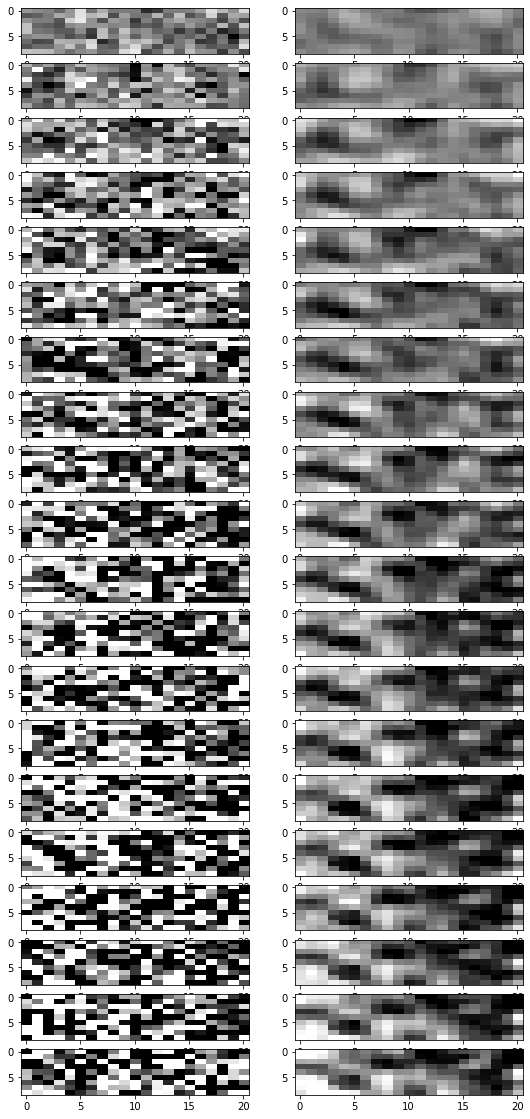

In [18]:
# Show with initial configuration
show_prediction_ground_truth()

Show pred/truth with sigma=0.3
Frame 0 // Mean error = -0.029894323822768677 // std = 0.30863424769135084
Frame 1 // Mean error = -0.023552673344877845 // std = 0.31253977882775585
Frame 2 // Mean error = 0.020872243410222174 // std = 0.3328403108382731
Frame 3 // Mean error = -0.03108891617988043 // std = 0.3505086827853804
Frame 4 // Mean error = -0.04353127925753942 // std = 0.38744409467669544
Frame 5 // Mean error = 0.0010120126263953038 // std = 0.40502472435248643
Frame 6 // Mean error = 0.014418242880978378 // std = 0.40033911158837493
Frame 7 // Mean error = 0.046814565974164835 // std = 0.3666543773152126
Frame 8 // Mean error = -0.007189778686335074 // std = 0.4268524765334471
Frame 9 // Mean error = 0.0015394873615227512 // std = 0.43379782139048656
Frame 10 // Mean error = 0.015422900321122502 // std = 0.45548957954864194
Frame 11 // Mean error = -0.03613644345667157 // std = 0.4341507920966083
Frame 12 // Mean error = 0.004916716251997319 // std = 0.42595092489461145
Fram

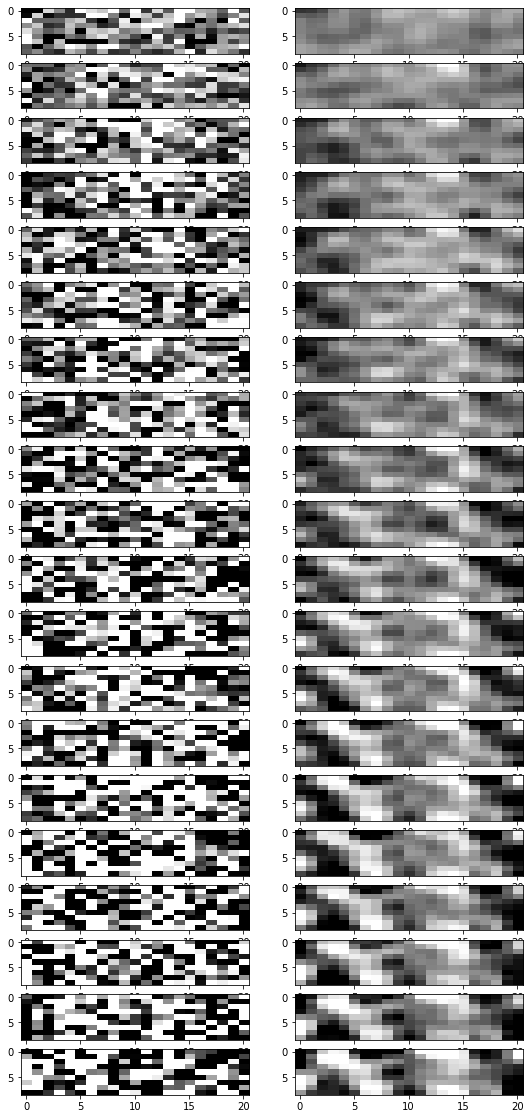

In [19]:
env.conf['sigma_prediction'] = 0.3
env.conf['gamma_gaussian_value'] = 0.05
env.conf['sigma_gaussian_value'] = -0.1


show_prediction_ground_truth()